In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
from deepctr.models import *
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

Importing Necessary Data

In [3]:
h1n1_train = pd.read_csv("h1n1_train.csv")

In [4]:
#h1n1_train.head()
h1n1_train.shape

(26707, 31)

In [5]:
seas_train = pd.read_csv("seas_train.csv")

In [6]:
#seas_train.head()
seas_train.shape

(26707, 29)

In [7]:
train_y = pd.read_csv("~/Desktop/flu_shot_learning/data/training_set_labels.csv")

In [8]:
# saving the target values for different viruses seperately
h1n1_y = train_y["h1n1_vaccine"]
seas_y = train_y["seasonal_vaccine"]

Data Preprocessing

In [9]:
# fill nas with -1
h1n1_train = h1n1_train.fillna('-1', )

seas_train = seas_train.fillna('-1', )

In [10]:
h1n1_sparse_features = list(h1n1_train.columns.values)

In [11]:
seas_sparse_features = list(seas_train.columns.values)

In [12]:
# 1.Label Encoding for sparse features,and do simple Transformation for dense features

In [13]:
for feat in h1n1_sparse_features:
    lbe = LabelEncoder()
    h1n1_train[feat] = lbe.fit_transform(h1n1_train[feat].astype(str))

In [14]:
for feat in seas_sparse_features:
    lbe = LabelEncoder()
    seas_train[feat] = lbe.fit_transform(seas_train[feat].astype(str))

In [15]:
h1n1_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size = h1n1_train[feat].nunique(), embedding_dim=2)
                              for i,feat in enumerate(h1n1_sparse_features)]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
seas_fixlen_feature_columns = [SparseFeat(feat, vocabulary_size = seas_train[feat].nunique(), embedding_dim=2)
                              for i,feat in enumerate(seas_sparse_features)]

In [17]:
h1n1_dnn_feature_columns = h1n1_fixlen_feature_columns
h1n1_linear_feature_columns = h1n1_fixlen_feature_columns

In [18]:
seas_dnn_feature_columns = seas_fixlen_feature_columns
seas_linear_feature_columns = seas_fixlen_feature_columns

In [19]:
h1n1_feature_names = get_feature_names(h1n1_linear_feature_columns + h1n1_dnn_feature_columns)

In [20]:
seas_feature_names = get_feature_names(seas_linear_feature_columns + seas_dnn_feature_columns)

Generate input data for model

In [21]:
h1n1_train_model_input = {name:h1n1_train[name] for name in h1n1_feature_names}

In [22]:
seas_train_model_input = {name:seas_train[name] for name in seas_feature_names}

Model Building

In [80]:
h1n1_model = AFM(h1n1_linear_feature_columns, h1n1_dnn_feature_columns, 
                 use_attention = True, attention_factor = 10, task='binary')

The following Variables were used a Lambda layer's call (lambda_9), but
are not present in its tracked objects:
  <tf.Variable 'afm_layer_9/projection_p:0' shape=(2, 1) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [81]:
h1n1_model.compile("adam", "binary_crossentropy",
                metrics=['AUC'], )

In [1]:
#h1n1_model.summary()

In [83]:
h1n1_history = h1n1_model.fit(h1n1_train_model_input, h1n1_y,
                batch_size = 16, epochs=15)

Epoch 1/15


c:\users\venkatesh k\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1670/1670 [==============================] - 13s 8ms/step - loss: 0.4059 - auc: 0.8201
Epoch 2/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3572 - auc: 0.8577
Epoch 3/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3537 - auc: 0.8606
Epoch 4/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3525 - auc: 0.8615
Epoch 5/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3515 - auc: 0.8624
Epoch 6/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3512 - auc: 0.8627
Epoch 7/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3510 - auc: 0.8631
Epoch 8/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3505 - auc: 0.8636
Epoch 9/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3505 - auc: 0.8635
Epoch 10/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.3502 - auc: 0.8639
Epoch 11/15
1670/1670 [=======

In [84]:
seas_model = AFM(seas_linear_feature_columns, seas_dnn_feature_columns,
                 use_attention = True, attention_factor = 10, task='binary')

The following Variables were used a Lambda layer's call (lambda_10), but
are not present in its tracked objects:
  <tf.Variable 'afm_layer_10/projection_p:0' shape=(2, 1) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [85]:
seas_model.compile("adam", "binary_crossentropy",
                metrics=['AUC'], )

In [2]:
#seas_model.summary()

In [87]:
seas_history = seas_model.fit(seas_train_model_input, seas_y,
                batch_size = 16, epochs=15)

Epoch 1/15
1670/1670 [==============================] - 12s 7ms/step - loss: 0.5240 - auc: 0.8275
Epoch 2/15
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4738 - auc: 0.8559
Epoch 3/15
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4692 - auc: 0.8585: 1s - loss
Epoch 4/15
1670/1670 [==============================] - 11s 7ms/step - loss: 0.4677 - auc: 0.8594
Epoch 5/15
1670/1670 [==============================] - 11s 7ms/step - loss: 0.4675 - auc: 0.8595
Epoch 6/15
1670/1670 [==============================] - 11s 7ms/step - loss: 0.4669 - auc: 0.8599
Epoch 7/15
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4666 - auc: 0.8601: 0s - loss: 0.4672 - 
Epoch 8/15
1670/1670 [==============================] - 12s 7ms/step - loss: 0.4663 - auc: 0.8603
Epoch 9/15
1670/1670 [==============================] - 14s 9ms/step - loss: 0.4661 - auc: 0.8604
Epoch 10/15
1670/1670 [==============================] - 13s 8ms/step - loss: 0.4657 

Prediction

In [88]:
test_id = pd.read_csv("test_id.csv")

In [89]:
test_id.shape

(26708, 1)

In [90]:
h1n1_test = pd.read_csv("h1n1_test.csv")
#h1n1_test.head()
h1n1_test.shape

(26708, 31)

In [91]:
seas_test = pd.read_csv("seas_test.csv")
#seas_test.head()
seas_test.shape

(26708, 29)

Test data preparation

In [92]:
# fill nas with -1
h1n1_test = h1n1_test.fillna('-1', )

seas_test = seas_test.fillna('-1', )

In [93]:
for feat in h1n1_sparse_features:
    lbe = LabelEncoder()
    h1n1_test[feat] = lbe.fit_transform(h1n1_test[feat].astype(str))

In [94]:
h1n1_test_model_input = {name:h1n1_test[name] for name in h1n1_feature_names}

In [95]:
for feat in seas_sparse_features:
    lbe = LabelEncoder()
    seas_test[feat] = lbe.fit_transform(seas_test[feat].astype(str))

In [96]:
seas_test_model_input = {name:seas_test[name] for name in seas_feature_names}

In [97]:
# prediction

In [98]:
h1n1_pred = h1n1_model.predict(h1n1_test_model_input, verbose = 1)

835/835 [==============================] - 4s 4ms/step


In [99]:
print("min prediction:", h1n1_pred.min())
print("max prediction:", h1n1_pred.max())
print("avg prediction:", h1n1_pred.sum()/len(h1n1_pred))

min prediction: 0.0036272407
max prediction: 0.98501086
avg prediction: 0.19678866043764978


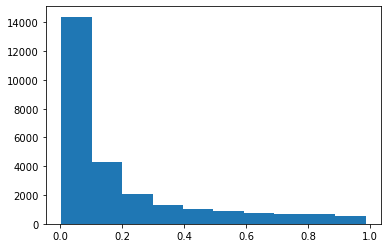

In [100]:
plt.hist(h1n1_pred[:,0], bins = 10)
plt.show()

In [101]:
seas_pred = seas_model.predict(seas_test_model_input, verbose = 1)

835/835 [==============================] - 3s 3ms/step


In [102]:
print("min prediction:", seas_pred.min())
print("max prediction:", seas_pred.max())
print("avg prediction:", seas_pred.sum()/len(seas_pred))

min prediction: 0.0035496354
max prediction: 0.99403334
avg prediction: 0.4768041542445148


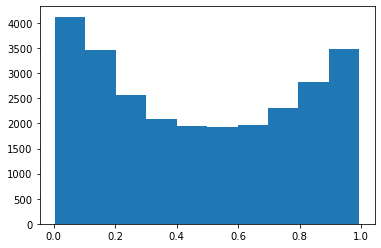

In [103]:
plt.hist(seas_pred[:,0], bins = 10)
plt.show()

In [104]:
submission = pd.DataFrame({
    "respondent_id": test_id['x']
})

In [105]:
submission["h1n1_vaccine"] = h1n1_pred[:,0]

In [106]:
submission["seasonal_vaccine"] = seas_pred[:,0]

In [1]:
#submission.head()

In [108]:
submission.to_csv("submission_10_AFM_overfitted.csv", index = False)